In [108]:
## Import modules as needed
import pandas as pd
import numpy as np
import altair as alt
import random

## enabling for altair
alt.enable_mime_rendering()

We first create the training examples. To do so we need to create
1. the true linear seperator ($w^*$)
2. generate a list of points ($x$) and its class ($y=h(x)$).

Note:
We are working in a 2-dimensional space ($x=(x_1,x_2)$). The form of the true linear seperator is $[0, w_1, w_2]$. And $h(x)=sign(w^Tx)$. If we were to show this as $y = ax + b$ this will be presented in $w_1, w_2$ as 


In [109]:
# random seed
random.seed(10)

w_star = [(random.random() * 10) for i in range(2)]
w_star = np.matrix([0] + w_star).T
w_star

matrix([[0.        ],
        [5.71402595],
        [4.28889055]])

Now we set up 100 random x and calculate the y

In [110]:
# random seed
random.seed(10)

x = np.matrix([[1,
               (random.random() - 0.5) * 100,
               (random.random() - 0.5) * 100] 
              for i in range(25)]).T
x


matrix([[  1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ],
        [  7.14025947,   7.80913011,  31.33212514,  15.34725339,
           2.06693596, -25.00033233,  49.65569925,  36.01610373,
         -11.83940141,  17.49648471,  18.58614855, -36.70218553,
          48.2413249 ,  11.33268205, -49.59448558,  44.10022714,
         -13.38543983, -18.5636195 ,  -6.39690424,   8.45462257,
         -34.35810816,  -8.71297923,  -0.33965014,  15.78909388,
          35.51257408],
        [ -7.11109453, -29.39017679,  32.35888725, -33.97704435,
         -17.22271884,  45.28169091, -45.54436175,  10.3190611 ,
         -21.63817821,  -4.31688489,  16.1

In [111]:
y = np.sign(w_star.T * x)
y

matrix([[ 1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
         -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.]])

In [120]:
plotting = pd.DataFrame(x[1:3].T, columns=["x","y"])
plotting.head()

In [130]:
np.column_stack((x.T, y.T)).T

matrix([[  1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ],
        [  7.14025947,   7.80913011,  31.33212514,  15.34725339,
           2.06693596, -25.00033233,  49.65569925,  36.01610373,
         -11.83940141,  17.49648471,  18.58614855, -36.70218553,
          48.2413249 ,  11.33268205, -49.59448558,  44.10022714,
         -13.38543983, -18.5636195 ,  -6.39690424,   8.45462257,
         -34.35810816,  -8.71297923,  -0.33965014,  15.78909388,
          35.51257408],
        [ -7.11109453, -29.39017679,  32.35888725, -33.97704435,
         -17.22271884,  45.28169091, -45.54436175,  10.3190611 ,
         -21.63817821,  -4.31688489,  16.1

In [127]:
print(x.shape)
print(y.shape)

(3, 25)
(1, 25)


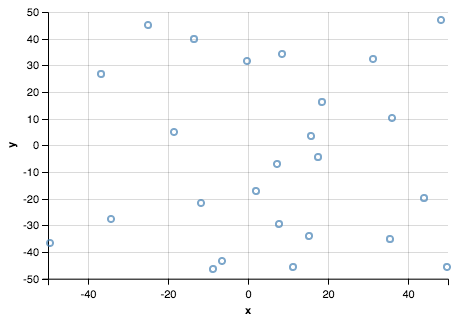

In [121]:
alt.Chart(plotting).mark_point().encode(
    x='x',
    y='y',
)